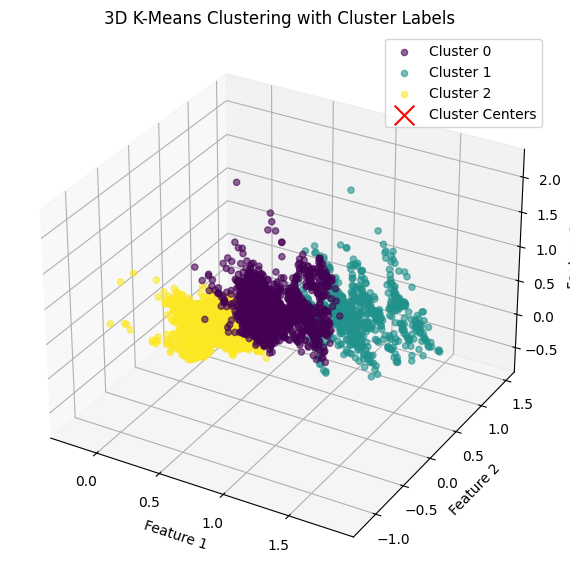
顏色對照

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [60]:
# 讀取 CSV 檔案
file_path = "sequences_df.csv"
df = pd.read_csv(file_path)
#print(df.head())
# 假設我們要使用數值型的列來做 Autoencoder
#df = df.select_dtypes(include=[np.number]).dropna()

print(df.head())
print(df.tail())
print(df.shape)
print(len(df))


   start_date  stock_id  close_price  \
0  2010-10-22      2317        114.0   
1  2010-10-25      2317        118.5   
2  2010-10-26      2317        118.0   
3  2010-10-27      2317        116.0   
4  2010-10-28      2317        116.5   

                                            sequence  
0  [[0.59090909 0.04873415 0.04846365 0.48783055 ...  
1  [[0.6969697  0.19278866 0.19648508 0.45783658 ...  
2  [[0.54545455 0.02147467 0.02148467 0.62309878 ...  
3  [[0.5        0.05779368 0.05676817 0.44400415 ...  
4  [[0.57575758 0.10654249 0.10544773 0.41471947 ...  
       start_date  stock_id  close_price  \
10403  2024-12-12      2454       1380.0   
10404  2024-12-13      2454       1410.0   
10405  2024-12-16      2454       1385.0   
10406  2024-12-17      2454       1425.0   
10407  2024-12-18      2454       1420.0   

                                                sequence  
10403  [[0.63235294 0.07118278 0.07348703 0.60260359 ...  
10404  [[0.63235294 0.05001051 0.04983552 0.51

In [61]:
# 讀取 CSV 檔案
file_path = "clustered_encoded_data.csv"
df_reduce_dim= pd.read_csv(file_path)
#print(df.head())
# 假設我們要使用數值型的列來做 Autoencoder
#df = df.select_dtypes(include=[np.number]).dropna()

print(df_reduce_dim.head())
print(df_reduce_dim.shape)
print(len(df_reduce_dim))

   Feature1  Feature2  Feature3  Cluster
0 -0.675784  0.014135  0.259927        0
1 -0.673951  0.011014  0.275752        0
2 -0.668412 -0.000567  0.266177        0
3 -0.665436 -0.008124  0.256095        0
4 -0.671571 -0.009925  0.259675        0
(10408, 4)
10408


In [62]:
df_draw=df[['start_date','close_price','stock_id']]
print(df_draw.head())

   start_date  close_price  stock_id
0  2010-10-22        114.0      2317
1  2010-10-25        118.5      2317
2  2010-10-26        118.0      2317
3  2010-10-27        116.0      2317
4  2010-10-28        116.5      2317


In [63]:
from sklearn.preprocessing import MinMaxScaler

# 對每支股票的收盤價進行 MinMax 縮放
df_draw['normalized_close'] = df_draw.groupby('stock_id')['close_price'].transform(
    lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
)

# 顯示處理後的結果
print("MinMax 縮放後的前5筆資料：")
print(df_draw.head())

# 驗證每支股票的縮放結果
for stock_id in df_draw['stock_id'].unique():
    stock_data = df_draw[df_draw['stock_id'] == stock_id]['normalized_close']
    print(f"\n股票 {stock_id} 的縮放統計：")
    print(f"最小值: {stock_data.min():.6f}")  # 應該接近 0
    print(f"最大值: {stock_data.max():.6f}")  # 應該接近 1

MinMax 縮放後的前5筆資料：
   start_date  close_price  stock_id  normalized_close
0  2010-10-22        114.0      2317          0.316940
1  2010-10-25        118.5      2317          0.344262
2  2010-10-26        118.0      2317          0.341226
3  2010-10-27        116.0      2317          0.329083
4  2010-10-28        116.5      2317          0.332119

股票 2317 的縮放統計：
最小值: 0.000000
最大值: 1.000000

股票 2330 的縮放統計：
最小值: 0.000000
最大值: 1.000000

股票 2454 的縮放統計：
最小值: 0.000000
最大值: 1.000000


In [64]:
df_draw['Cluster'] = df_reduce_dim['Cluster'].values

In [65]:
print(df_draw.head())

   start_date  close_price  stock_id  normalized_close  Cluster
0  2010-10-22        114.0      2317          0.316940        0
1  2010-10-25        118.5      2317          0.344262        0
2  2010-10-26        118.0      2317          0.341226        0
3  2010-10-27        116.0      2317          0.329083        0
4  2010-10-28        116.5      2317          0.332119        0


In [66]:
df_2317 = df_draw[df_draw['stock_id'] == 2317]
df_2330 = df_draw[df_draw['stock_id'] == 2330]
df_2454 = df_draw[df_draw['stock_id'] == 2454]

print(df_2317.head())  # 顯示 2317 的數據
print(df_2330.head())  # 顯示 2330 的數據
print(df_2454.head())  # 顯示 2454 的數據


   start_date  close_price  stock_id  normalized_close  Cluster
0  2010-10-22        114.0      2317          0.316940        0
1  2010-10-25        118.5      2317          0.344262        0
2  2010-10-26        118.0      2317          0.341226        0
3  2010-10-27        116.0      2317          0.329083        0
4  2010-10-28        116.5      2317          0.332119        0
      start_date  close_price  stock_id  normalized_close  Cluster
3465  2010-10-22         61.8      2330          0.000000        0
3466  2010-10-25         62.0      2330          0.000195        0
3467  2010-10-26         62.3      2330          0.000486        0
3468  2010-10-27         62.0      2330          0.000195        0
3469  2010-10-28         62.7      2330          0.000875        0
      start_date  close_price  stock_id  normalized_close  Cluster
6937  2010-10-22        387.0      2454          0.149083        2
6938  2010-10-25        395.0      2454          0.155199        2
6939  2010-10

In [67]:
# 轉換日期
df_2317["start_date"] = pd.to_datetime(df_2317["start_date"])
df_2317 = df_2317.sort_values(by=["start_date"]).reset_index(drop=True)
print(len(df_2317)) 
print(df_2317.head())  # 顯示 2317 的數據


# 轉換日期
df_2330["start_date"] = pd.to_datetime(df_2330["start_date"])
df_2330 = df_2330.sort_values(by=["start_date"]).reset_index(drop=True)

print(df_2330.head())  # 顯示 2330 的數據



# 轉換日期
df_2454["start_date"] = pd.to_datetime(df_2454["start_date"])
df_2454 = df_2454.sort_values(by=["start_date"]).reset_index(drop=True)

print(df_2454.head())  # 顯示 2454 的數據



3465
  start_date  close_price  stock_id  normalized_close  Cluster
0 2010-10-22        114.0      2317          0.316940        0
1 2010-10-25        118.5      2317          0.344262        0
2 2010-10-26        118.0      2317          0.341226        0
3 2010-10-27        116.0      2317          0.329083        0
4 2010-10-28        116.5      2317          0.332119        0
  start_date  close_price  stock_id  normalized_close  Cluster
0 2010-10-22         61.8      2330          0.000000        0
1 2010-10-25         62.0      2330          0.000195        0
2 2010-10-26         62.3      2330          0.000486        0
3 2010-10-27         62.0      2330          0.000195        0
4 2010-10-28         62.7      2330          0.000875        0
  start_date  close_price  stock_id  normalized_close  Cluster
0 2010-10-22        387.0      2454          0.149083        2
1 2010-10-25        395.0      2454          0.155199        2
2 2010-10-26        393.0      2454          0.153

/tmp/ipykernel_961409/3767843035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2317["start_date"] = pd.to_datetime(df_2317["start_date"])
/tmp/ipykernel_961409/3767843035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2330["start_date"] = pd.to_datetime(df_2330["start_date"])
/tmp/ipykernel_961409/3767843035.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [68]:
df_2317 = df_2317.drop(columns=['close_price','stock_id'])
print(len(df_2317))  # 顯示 2317 的數據0
print(df_2317.head())  # 顯示 2317 的數據
print(df_2317['Cluster'].unique())
df_2330 = df_2330.drop(columns=['close_price','stock_id'])
print(len(df_2330))  # 顯示 2330 的數據
print(df_2330.head())  # 顯示 2330 的數據
print(df_2330['Cluster'].unique())
df_2454 = df_2454.drop(columns=['close_price','stock_id'])
print(len(df_2454))  # 顯示 2454 的數據
print(df_2454.head())  # 顯示 2454 的數據
print(df_2454['Cluster'].unique())

3465
  start_date  normalized_close  Cluster
0 2010-10-22          0.316940        0
1 2010-10-25          0.344262        0
2 2010-10-26          0.341226        0
3 2010-10-27          0.329083        0
4 2010-10-28          0.332119        0
[0 2 1]
3472
  start_date  normalized_close  Cluster
0 2010-10-22          0.000000        0
1 2010-10-25          0.000195        0
2 2010-10-26          0.000486        0
3 2010-10-27          0.000195        0
4 2010-10-28          0.000875        0
[0 1 2]
3471
  start_date  normalized_close  Cluster
0 2010-10-22          0.149083        2
1 2010-10-25          0.155199        2
2 2010-10-26          0.153670        2
3 2010-10-27          0.146024        2
4 2010-10-28          0.152141        2
[2 0 1]


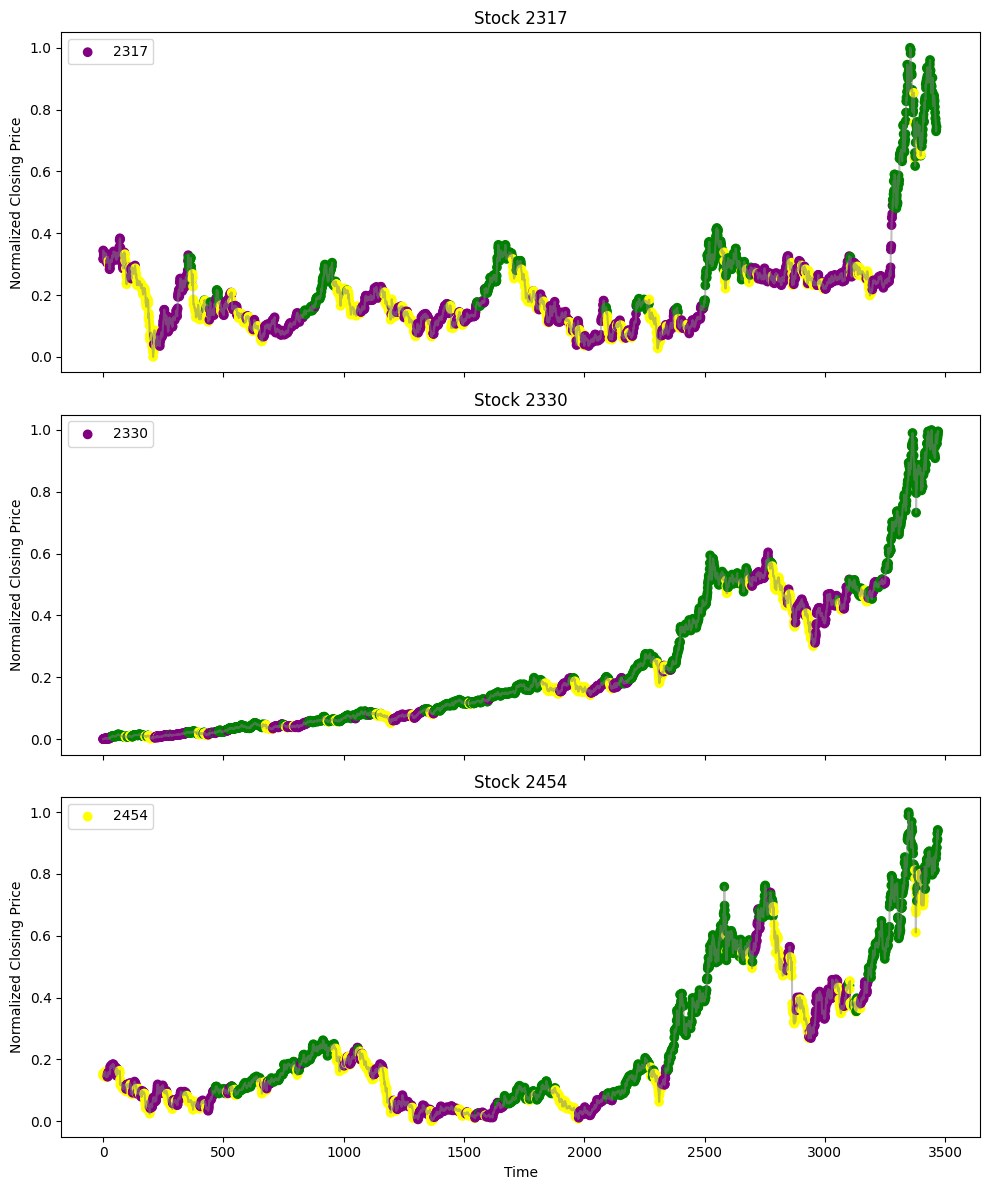

In [69]:

import matplotlib.pyplot as plt

# 定義顏色對應
cluster_colors = {0: 'purple', 1: 'green', 2: 'yellow'}

# 創建畫布
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# 繪製 df_2317
axes[0].scatter(df_2317.index, df_2317['normalized_close'], 
                c=df_2317['Cluster'].map(cluster_colors), label="2317")
axes[0].plot(df_2317.index, df_2317['normalized_close'], linestyle='-', alpha=0.5, color='gray')
axes[0].set_title('Stock 2317')

# 繪製 df_2330
axes[1].scatter(df_2330.index, df_2330['normalized_close'], 
                c=df_2330['Cluster'].map(cluster_colors), label="2330")
axes[1].plot(df_2330.index, df_2330['normalized_close'], linestyle='-', alpha=0.5, color='gray')
axes[1].set_title('Stock 2330')

# 繪製 df_2454
axes[2].scatter(df_2454.index, df_2454['normalized_close'], 
                c=df_2454['Cluster'].map(cluster_colors), label="2454")
axes[2].plot(df_2454.index, df_2454['normalized_close'], linestyle='-', alpha=0.5, color='gray')
axes[2].set_title('Stock 2454')

# 添加標籤
for ax in axes:
    ax.set_ylabel('Normalized Closing Price')
    ax.legend()
    
axes[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()


In [77]:
df_2317['start_date']
df_2317['start_date'].to_csv('../3-2爬蟲爬取股票新聞資料/爬蟲用日期_鴻海.csv', index=False, date_format='%Y-%m-%d')


In [79]:
df_2330['start_date']
df_2330['start_date'].to_csv('../3-2爬蟲爬取股票新聞資料/爬蟲用日期_台積電.csv', index=False, date_format='%Y-%m-%d')


In [78]:
df_2454['start_date']
df_2454['start_date'].to_csv('../3-2爬蟲爬取股票新聞資料/爬蟲用日期_聯發科.csv', index=False, date_format='%Y-%m-%d')
